# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [7]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [8]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [9]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,shortname,state
0,Dade,12345,Rick Scott,FL,Florida
1,Broward,40000,Rick Scott,FL,Florida
2,Palm Beach,60000,Rick Scott,FL,Florida
3,Summit,1234,John Kasich,OH,Ohio
4,Cuyahoga,1337,John Kasich,OH,Ohio


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [10]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [11]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [12]:
# load json as string
#json.load((open('data/world_bank_projects.json')))

In [62]:
# load as Pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')

# first three rows of the dataset 
json_df.head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Name': 'Regional integration', 'Percent': 46}","[{'name': 'Regional integration', 'code': '47'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


In [63]:
json_df.shape

(500, 50)

In [64]:
# summary of the integer columns of the data set
json_df.describe()

,approvalfy,grantamt,ibrdcommamt,idacommamt,lendprojectcost,totalamt,totalcommamt
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2013.108000,4.432400e+06,3.286010e+07,3.542136e+07,1.547241e+08,6.828146e+07,7.271386e+07
std,0.722066,2.023307e+07,1.089197e+08,7.681431e+07,4.764211e+08,1.242662e+08,1.234705e+08
min,1999.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+04,0.000000e+00,3.000000e+04
25%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.472500e+06,0.000000e+00,5.000000e+06
50%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+07,2.000000e+07,2.500000e+07
75%,2013.000000,1.695000e+06,0.000000e+00,3.700000e+07,1.021250e+08,8.625000e+07,9.045000e+07
max,2015.000000,3.650000e+08,1.307800e+09,6.000000e+08,5.170000e+09,1.307800e+09,1.307800e+09


In [65]:
# detail information of the columns of the dataset 
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

# 1. Ten Countries with the Most Amount of the Projects

In [267]:
json_df.isnull().any()['countryname']

False

In [268]:
len(json_df['countryname'].unique())

118

**Observation:** 
1. There is no missing value in 'countryname' column
2. There are 118 countries' data is present in the dataset

In [68]:
# Multiple ways to find the 10 countries with most projects
# e.g
# max_ten_countries = json_df.groupby('countryname')['countryname'].count().sort_values(ascending=False)[:10]

# using pandas only 
max_ten_countries = json_df['countryname'].value_counts()[:10]
max_ten_countries

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

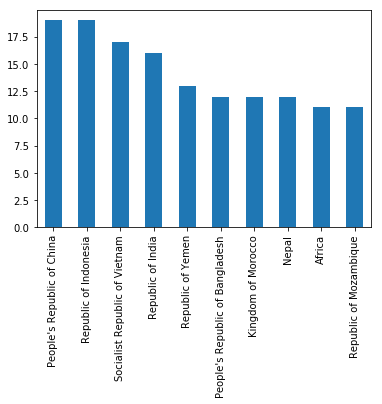

In [159]:
# a bar plot of 10 countries with highest amount of projects
%matplotlib inline
max_ten_countries.plot(kind='bar')
plt.show()

# 2. Top 10 Major Project Theme

In [70]:
# A few sample rows of the 'mjtheme_namecode' column 
json_df['mjtheme_namecode'].head(10)

0    [{'name': 'Human development', 'code': '8'}, {...
1    [{'name': 'Economic management', 'code': '1'},...
2    [{'name': 'Trade and integration', 'code': '5'...
3    [{'name': 'Social dev/gender/inclusion', 'code...
4    [{'name': 'Trade and integration', 'code': '5'...
5    [{'name': 'Social protection and risk manageme...
6    [{'name': 'Public sector governance', 'code': ...
7    [{'name': 'Environment and natural resources m...
8    [{'name': 'Rural development', 'code': '10'}, ...
9    [{'name': 'Public sector governance', 'code': ...
Name: mjtheme_namecode, dtype: object

In [71]:
new_df = pd.DataFrame(columns=['code','name'])
for index, value in json_df['mjtheme_namecode'].items():
    new_df = pd.concat([new_df,pd.DataFrame(value)])    

new_df.head()

,code,name
0,8,Human development
1,11,
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration


In [195]:
# without ignoring the empty name values most common themes
themes_w_empty_str = new_df.name.value_counts()[:10]
themes_w_empty_str

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

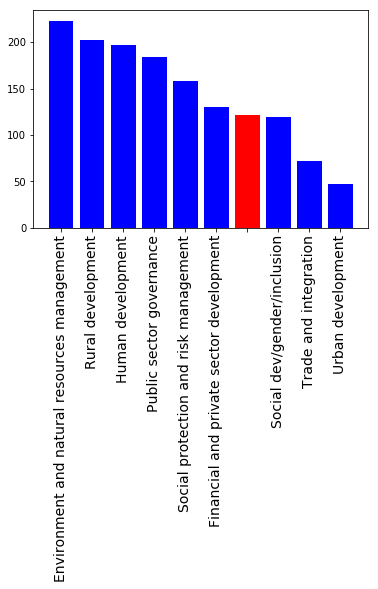

In [241]:
# bar plot visualizing the project bar with no name
color = list('b'*len(themes_w_empty_str))
color [6] = 'r'
plt.bar(np.arange(len(themes_w_empty_str.index)),list(themes_w_empty_str.values),color =color)
plt.xticks(np.arange(len(themes_w_empty_str.index)), themes_w_empty_str.index,rotation=90,fontsize =14);
plt.show()

In [256]:
# after replacing the missing values list top 10 themes
ind =new_df['code'].value_counts().index[:10]
top_themes_df = new_df.reset_index(drop=True).groupby('code').agg({'name':'max'})
top_themes_df.loc[ind]['name']

11    Environment and natural resources management
10                               Rural development
8                                Human development
2                         Public sector governance
6            Social protection and risk management
4         Financial and private sector development
7                      Social dev/gender/inclusion
5                            Trade and integration
9                                Urban development
1                              Economic management
Name: name, dtype: object

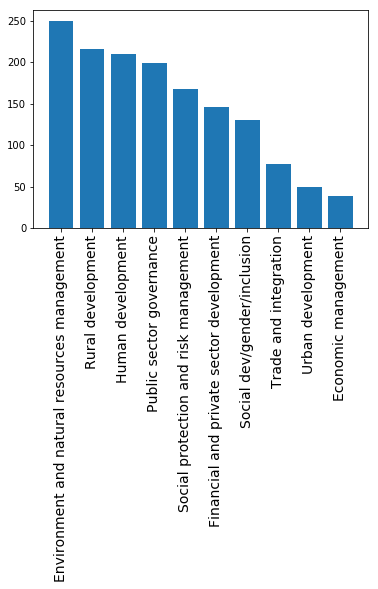

In [257]:
plt.bar(np.arange(10),list(new_df['code'].value_counts().values[:10]))
plt.xticks(np.arange(10), top_themes_df.loc[ind]['name'] ,rotation = 90, fontsize =14);
plt.show()

# 3. Fill in the missing 'name' with appropriate values

In [265]:
# before replacing the missing values 
json_df.mjtheme_namecode.values[:1]

array([ list([{'name': 'Human development', 'code': '8'}, {'name': 'Environment and natural resources management', 'code': '11'}])], dtype=object)

In [266]:
#after replacing the missing values 
for index, value in json_df['mjtheme_namecode'].items():
    for item in value:
        item['name'] = top_themes_df.loc[item['code']]['name']

json_df.mjtheme_namecode.values[:1]

array([ list([{'name': 'Human development', 'code': '8'}, {'name': 'Environment and natural resources management', 'code': '11'}])], dtype=object)

## Obervation
Before replacing the missing values, the name of the second element was missing, which was replaced by 'Environment and natural resources management' after handling missing values.